In [2]:
import warnings

warnings.filterwarnings('ignore')

In [3]:
import pandas as pd
import numpy as np
import cv2
import matplotlib.pyplot as plt

import os

import random

from utils import *

In [3]:
# files = pd.DataFrame(os.listdir('data/zero_hour_images'))

# files.rename(columns={0:'File'}, inplace=True)
# files = files[~files['File'].str.contains('ipynb')]
# files['Run'] = files['File'].str.split('_').str[0].str.replace('Run', '', regex=False).astype(int)
# files['Cell'] = files['File'].str.split('_').str[2]
# files.sort_values(['File'], inplace=True)
# files = files.groupby(['Run', 'Cell']).tail(1)
# files['EVAL'] = files['File'].str.contains('EVALUATE.jpg')
# files.sort_values(['Run', 'Cell'], inplace=True)
# files.drop_duplicates(inplace=True)
# files.head()

In [12]:
images = []

for file in os.listdir('data/cropped'):
    
    if 'tif' not in file and '0Hr' not in file:
        continue

    try:
        img = cv2.imread('data/cropped/{}'.format(file))
    except:
        continue
            
    images.append((file, img))

In [13]:
len(images)

5562

In [25]:
all_extracted = []
failed_images = []
total = 0

for img in images:
    
    try:
        ex = show_processed_image(img[1], False)
    except:
        failed_images.append(img[0])
        continue
        
    all_extracted.append((img[0], ex))
    total += 1
    print('{}/{} have been extracted'.format(total, len(images)), end='\r', flush=True)
    
pd.DataFrame(failed_images, columns=['File']).to_csv('data/failed_extraction_list.csv', index=False)

In [37]:
if not os.path.exists('data/extracted/'):
    os.makedirs('.data/extracted')
    
for i, img in enumerate(all_extracted):
    
    cv2.imwrite('data/extracted/{}'.format(img[0].replace('.tif', '.png')), img[1])
    print('{}/{} have been saved'.format(i+1, len(all_extracted)), end='\r', flush=True)

For display purpose

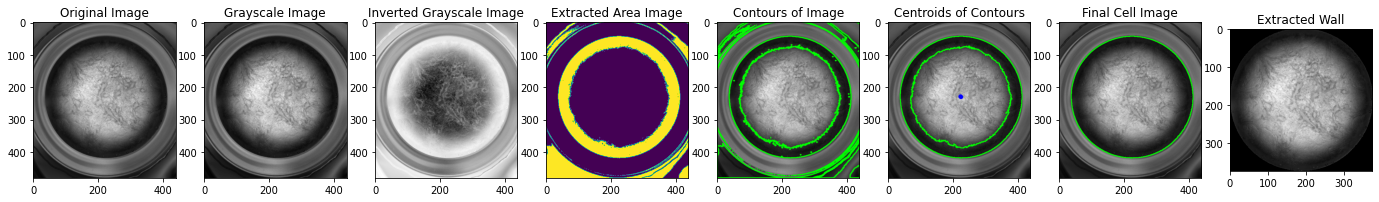

In [26]:
_ = show_processed_image(images[0][1])

In [13]:
all_extracted = os.listdir('data/extracted')
all_extracted = ['data/extracted/'+x for x in all_extracted]

In [18]:
# sampled_images = random.sample(all_extracted, k=16)
    
# fig, ax = plt.subplots(4, 4, figsize=(24, 24))

# for i in range(len(sampled_images)):
    
#     row, col = i//4, i%4
    
#     ax[row][col].imshow(sampled_images[i][1], cmap='gray')
#     ax[row][col].set_title(sampled_images[i][0], fontsize=13)